# **💰 Bitcoin(Cryptocurrency) Price Prediction Using Machine Learning**

---


This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting the closing prices of bitcoin with its historical data.

We're going to take the following approach:
* Problem defination
* Data
* Evaluation
* Features
* Modelling
* Experimentation
                                        
## **1. Problem Defination**
In a Statement,
> Given historical data of bitcoin , can we predict the closing prices of our Bitcoin for Current Dataset as well as for near future.

##**2. Data**
The Data came from the Kaggle Dataset Section:

https://www.kaggle.com/varpit94/bitcoin-data-updated-till-26jun2021

And we, updated the dataset with the latest values of the current market.

##**3. Evaluation**

> If we can reach 90% Accuracy at predicting the closing prices of bitcoin till then,  we'll pursue the project.

##**4. Features**
This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary**


1. Date- Date at which the data was recorded.
2. Open- Price from the first transaction of a trading day.
3. High- Maximum price in a trading day.
4. Low- Minimum price in a trading day.
5. Close - Price from the last transaction of a trading day.
6. Adj Close - Closing price adjusted to reflect the value after accounting for any corporate actions.
7. Volume - Number of unites traded in a day.

## **Preparing the Tools**
We're going to use Pandas, Matplotlib and NumPy for data analysis and manipulation.

In [ ]:
#Importing all the tools we need.

#Regular EDA(Exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Model Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

## **Loading the data**

In [ ]:
# For mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# To run this whole project make sure you place the dataset in Directory and confirm it's path as mentioned below:
df = pd.read_csv("/content/drive/MyDrive/Mini Project/BTC-USD.csv", parse_dates = ['Date'])

##**Data Exploration**
The goal is to find out more about the data and become a subject matter expert on the dataset we are working on.

1. What questions we are trying to solve?
2. What kind of data do we have and how do we treat different data types?
3. What's missing from the data and how will we deal with it?
4. Where are the outliers and why should we care about them?
5. How can we add,change or remove features to get more out of our data?

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2646,2021-12-15,48379.753906,49473.957031,46671.964844,48896.722656,48896.722656,3.654183e+10
2647,2021-12-16,48900.464844,49425.574219,47529.878906,47665.425781,47665.425781,2.726815e+10
2648,2021-12-17,47653.730469,48004.894531,45618.214844,46202.144531,46202.144531,3.290273e+10
2649,2021-12-18,46219.253906,47313.828125,45598.441406,46848.777344,46848.777344,2.609829e+10
2650,2021-12-19,46902.777344,47973.355469,46544.714844,47638.589844,47638.589844,2.563318e+10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2651 non-null   datetime64[ns]
 1   Open       2647 non-null   float64       
 2   High       2647 non-null   float64       
 3   Low        2647 non-null   float64       
 4   Close      2647 non-null   float64       
 5   Adj Close  2647 non-null   float64       
 6   Volume     2647 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 145.1 KB


In [ ]:
df.shape


(2651, 7)

##**Checking if there are any missing values**


In [ ]:
df.isnull().sum()

Date         0
Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64

##**Handling the Missing Vale**

In [ ]:
mean=df['Open'].mean()
df['Open'].fillna(value=mean,inplace=True)
mean=df['High'].mean()
df['High'].fillna(value=mean,inplace=True)
mean=df['Low'].mean()
df['Low'].fillna(value=mean,inplace=True)
mean=df['Close'].mean()
df['Close'].fillna(value=mean,inplace=True)
mean=df['Adj Close'].mean()
df['Adj Close'].fillna(value=mean,inplace=True)
mean=df['Volume'].mean()
df['Volume'].fillna(value=mean,inplace=True)

In [ ]:
#Rechecking if there still exists any missing values!!!
df.isnull().sum()


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

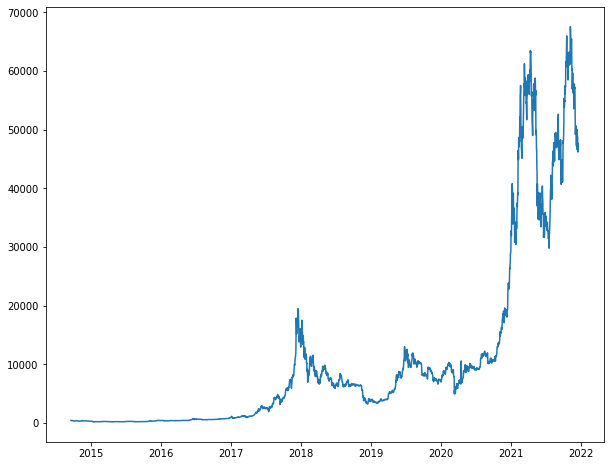

In [ ]:
fig,ax= plt.subplots(figsize=(10,8))
ax.plot(df["Date"],df["Close"]);

##**Make a copy of the Original DataFrame**

###We make a copy of the original dataframe so when we manipulate the copy, we've still got out original data

In [ ]:
df_tmp= df.copy()
df_tmp['Return %'] = df_tmp['Close'].pct_change()
df_tmp

,Date,Open,High,Low,Close,Adj Close,Volume,Return %
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07,NaN
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07,-0.071926
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07,-0.069843
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07,0.035735
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07,-0.024659
...,...,...,...,...,...,...,...,...
2646,2021-12-15,48379.753906,49473.957031,46671.964844,48896.722656,48896.722656,3.654183e+10,0.049002
2647,2021-12-16,48900.464844,49425.574219,47529.878906,47665.425781,47665.425781,2.726815e+10,-0.025182
2648,2021-12-17,47653.730469,48004.894531,45618.214844,46202.144531,46202.144531,3.290273e+10,-0.030699
2649,2021-12-18,46219.253906,47313.828125,45598.441406,46848.777344,46848.777344,2.609829e+10,0.013996


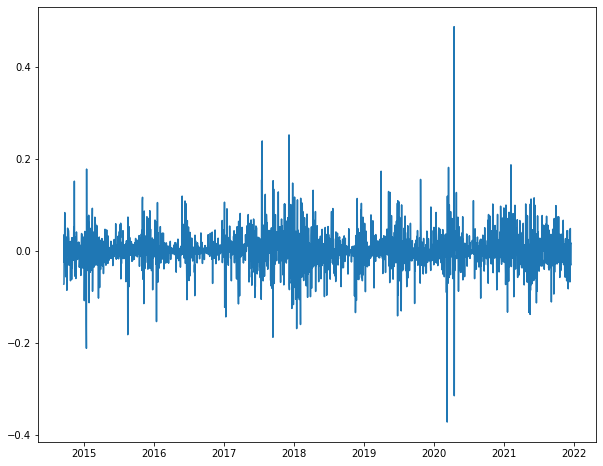

In [ ]:
# Return with respect to Dates
fig,ax= plt.subplots(figsize=(10,8))
ax.plot(df_tmp["Date"],df_tmp["Return %"]);

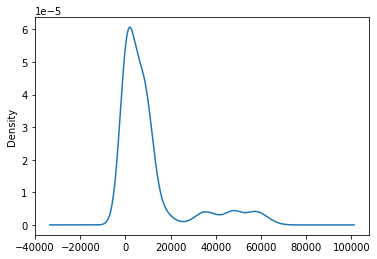

In [ ]:
df_tmp['Close'].plot(kind = "kde");

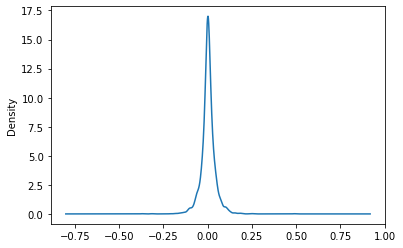

In [ ]:
# Thinner Bell Curve for Return Price
df_tmp['Return %'].plot(kind = "kde");

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


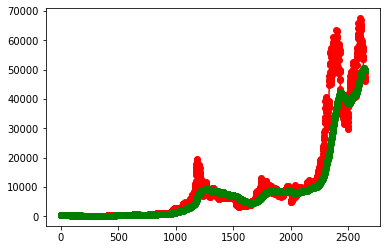

In [ ]:
#explonential Smoothing

from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model  = SimpleExpSmoothing(df_tmp['Close']).fit(smoothing_level = 0.01, optimized = False)

df_tmp['Close'].plot(marker = 'o', color = 'red')
model.fittedvalues.plot(marker = 'o', color = 'green');

##**lag plot to check if the series is random**

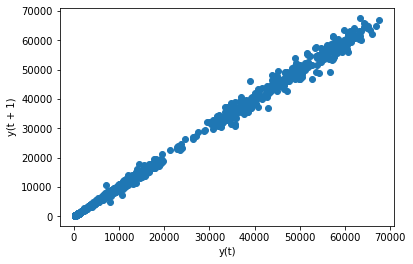

In [ ]:
from pandas.plotting import lag_plot
lag_plot(df_tmp['Close']);

##**Correlation Matrix**

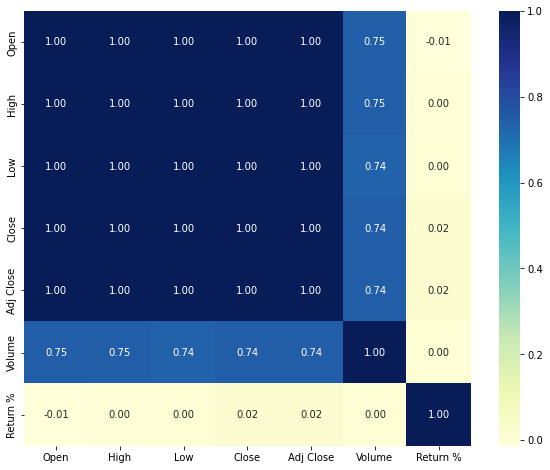

In [ ]:
df_tmp.corr()
# Making Correalation Matrix more Understandable
corr_matrix= df_tmp.corr()
fig,ax = plt.subplots(figsize=(10,8))
ax= sns.heatmap(corr_matrix,
                annot=True,
                fmt= ".2f",
                cmap= "YlGnBu");

##**Splitting the data into Train and Test sets**


In [ ]:
#Setting The training set ratio
training_ratio = 80

#Calculating the test set ratio
test_ratio = 20

#Rounding the training set length to avoid fractions
training_len = round(len(df)*(training_ratio/100))

#Setting the Test set length
test_len = round(len(df)-training_len)

#Splitting the data based on the calculated lengths
dataset_train = df.head(training_len)
dataset_test = df.tail(test_len)

#Printing the shapes of training and test sets

print("Shape Of Training Set :", dataset_train.shape)
print("Shape Of Test Set :", dataset_test.shape)

Shape Of Training Set : (2121, 7)
Shape Of Test Set : (530, 7)


##**Understanding the splitted data**

In [ ]:
print(dataset_test.head(10))
print(dataset_train.tail(10))

           Date         Open         High          Low        Close  \
2121 2020-07-08  9253.020508  9450.335938  9249.500000  9428.333008   
2122 2020-07-09  9427.994141  9431.378906  9234.999023  9277.967773   
2123 2020-07-10  9273.357422  9287.471680  9118.001953  9278.807617   
2124 2020-07-11  9277.511719  9293.532227  9199.485352  9240.346680   
2125 2020-07-12  9241.054688  9319.418945  9197.450195  9276.500000   
2126 2020-07-13  9277.205078  9306.405273  9224.292969  9243.614258   
2127 2020-07-14  9238.703125  9283.841797  9171.661133  9243.213867   
2128 2020-07-15  9241.897461  9275.325195  9171.933594  9192.836914   
2129 2020-07-16  9191.980469  9214.312500  9088.947266  9132.227539   
2130 2020-07-17  9131.812500  9182.253906  9089.202148  9151.392578   

        Adj Close        Volume  
2121  9428.333008  1.970236e+10  
2122  9277.967773  1.800070e+10  
2123  9278.807617  1.686004e+10  
2124  9240.346680  1.324991e+10  
2125  9276.500000  1.445236e+10  
2126  9243.614

In [ ]:
#Setting Date column as Index
dataset_train.set_index('Date', inplace = True)

##**Feature Scaling**


In [ ]:
sc = MinMaxScaler(feature_range = (0,1))

def bit_pre_process(raw_data , seq_len, column = 1):
  
  #Select the feature/column 
  data = raw_data.iloc[:, column].values
  data = data.reshape(-1, 1)
  
  #Feature Scaling
  data = sc.fit_transform(data)
  
  #Making sequences
  
  X = []
  y = []

  for i in range(seq_len, len(data)):
      X.append(data[i-seq_len:i, 0])
      y.append(data[i, 0])
  X, y = np.array(X), np.array(y)

  # Reshaping
  X = np.reshape(X, (X.shape[0], X.shape[1], 1))
  
  return X, y

##**Sequencing**

In [ ]:
  #Setting the sequence length 
sequence_length = 60

#Choosing the idex of the Close column
column_index= 3

#Preprocessing the training set
X_train, y_train = bit_pre_process(dataset_train , sequence_length, column_index)

In [ ]:
X_train.shape

(2061, 60, 1)

In [ ]:
y_train.shape

(2061,)

##**Building the Recurrent Neural Network model using LSTM**

In [ ]:
#Initialising the RNN
regressor = Sequential()

#Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

#Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

#Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

#Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

#Adding the output layer
regressor.add(Dense(units = 1))

##**Compiling the RNN**

In [ ]:
#Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse', 'mae'])

In [ ]:
#Fitting the RNN to the Training set and training the RNN
regressor.fit(X_train, y_train, epochs = 50, batch_size = 50)

Epoch 1/50
42/42 [==============================] - 34s 334ms/step - loss: 0.0134 - mse: 0.0134 - mae: 0.0746
Epoch 2/50
42/42 [==============================] - 7s 156ms/step - loss: 0.0034 - mse: 0.0034 - mae: 0.0330
Epoch 3/50
42/42 [==============================] - 6s 144ms/step - loss: 0.0031 - mse: 0.0031 - mae: 0.0314
Epoch 4/50
42/42 [==============================] - 6s 143ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0298
Epoch 5/50
42/42 [==============================] - 6s 144ms/step - loss: 0.0027 - mse: 0.0027 - mae: 0.0299
Epoch 6/50
42/42 [==============================] - 6s 152ms/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0299
Epoch 7/50
42/42 [==============================] - 6s 146ms/step - loss: 0.0024 - mse: 0.0024 - mae: 0.0291
Epoch 8/50
42/42 [==============================] - 6s 144ms/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0284
Epoch 9/50
42/42 [==============================] - 6s 143ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0268
Epoch 10/50
42/42 

##**Preparing test data**

In [ ]:
#Displaying the dataset
dataset_test.head() 

,Date,Open,High,Low,Close,Adj Close,Volume
2121,2020-07-08,9253.020508,9450.335938,9249.500000,9428.333008,9428.333008,1.970236e+10
2122,2020-07-09,9427.994141,9431.378906,9234.999023,9277.967773,9277.967773,1.800070e+10
2123,2020-07-10,9273.357422,9287.471680,9118.001953,9278.807617,9278.807617,1.686004e+10
2124,2020-07-11,9277.511719,9293.532227,9199.485352,9240.346680,9240.346680,1.324991e+10
2125,2020-07-12,9241.054688,9319.418945,9197.450195,9276.500000,9276.500000,1.445236e+10


In [ ]:
dataset_test.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2646,2021-12-15,48379.753906,49473.957031,46671.964844,48896.722656,48896.722656,3.654183e+10
2647,2021-12-16,48900.464844,49425.574219,47529.878906,47665.425781,47665.425781,2.726815e+10
2648,2021-12-17,47653.730469,48004.894531,45618.214844,46202.144531,46202.144531,3.290273e+10
2649,2021-12-18,46219.253906,47313.828125,45598.441406,46848.777344,46848.777344,2.609829e+10
2650,2021-12-19,46902.777344,47973.355469,46544.714844,47638.589844,47638.589844,2.563318e+10


In [ ]:
#Setting the Date column as Index to the dataset
dataset_test.set_index('Date', inplace = True)

In [ ]:
dataset_test.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-08,9253.020508,9450.335938,9249.500000,9428.333008,9428.333008,1.970236e+10
2020-07-09,9427.994141,9431.378906,9234.999023,9277.967773,9277.967773,1.800070e+10
2020-07-10,9273.357422,9287.471680,9118.001953,9278.807617,9278.807617,1.686004e+10
2020-07-11,9277.511719,9293.532227,9199.485352,9240.346680,9240.346680,1.324991e+10
2020-07-12,9241.054688,9319.418945,9197.450195,9276.500000,9276.500000,1.445236e+10


In [ ]:
dataset_test.shape

(530, 6)

In [ ]:
test_set = pd.concat((dataset_train.tail(sequence_length), dataset_test), axis = 0)

In [ ]:
test_set.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-05-09,9840.906250,9913.863281,9580.644531,9593.896484,9593.896484,4.656612e+10
2020-05-10,9591.168945,9595.581055,8395.107422,8756.430664,8756.430664,6.332528e+10
2020-05-11,8755.535156,9033.470703,8374.323242,8601.795898,8601.795898,5.711986e+10
2020-05-12,8610.385742,8949.898438,8569.643555,8804.477539,8804.477539,4.214272e+10
2020-05-13,8805.387695,9317.878906,8805.387695,9269.987305,9269.987305,4.555814e+10
2020-05-14,9271.329102,9793.268555,9255.035156,9733.721680,9733.721680,5.642691e+10
2020-05-15,9734.291016,9755.828125,9261.398438,9328.197266,9328.197266,4.815880e+10
2020-05-16,9333.240234,9564.205078,9260.694336,9377.013672,9377.013672,3.616477e+10
2020-05-17,9374.929688,9823.001953,9349.545898,9670.739258,9670.739258,4.008425e+10


In [ ]:
test_set.shape

(590, 6)

In [ ]:
#Preprocessing the test data
x_test, y_true = bit_pre_process(test_set , sequence_length, column_index)

In [ ]:
x_test.shape

(530, 60, 1)

In [ ]:
y_true.shape

(530,)

##**Finding the Error values**


In [ ]:
score=regressor.evaluate(x_test,y_true)
loss=score[0]
mse=score[1]
mae=score[2]

17/17 [==============================] - 2s 32ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0305


In [ ]:
loss

0.0017196089029312134

In [ ]:
mse

0.0017196089029312134

In [ ]:
mae

0.030467281118035316

##**Prediction**

In [ ]:
#Predicting the closing price of the test data
predicted_stock_price = regressor.predict(x_test)

In [ ]:
#Inversing the scaled values 
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
#Inversing the scaled actual prices from test data
real_stock_price = sc.inverse_transform(y_true.reshape(-1, 1))

##**Visualising the Prediction**

In [ ]:
# A Method to plot predicted pirce vs Actual price
def plot_predictions(real_stock_price, predicted_stock_price, title, x_label, y_label):
    plt.plot(real_stock_price, color = 'green', label = 'Real Stock Price')
    plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

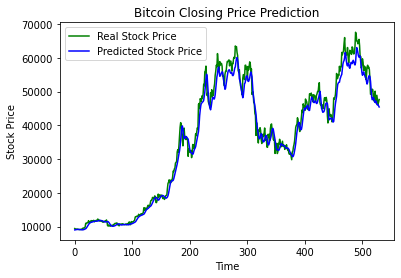

In [ ]:
#Plotting real_stock_pric vs predicted_stock_price
plot_predictions(real_stock_price, predicted_stock_price, "Bitcoin Closing Price Prediction", "Time", "Stock Price")

##**Comparing the Predicted and Actual prices**

In [ ]:
dataset_test['Predicted_Close'] = predicted_stock_price

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
compare = dataset_test[['Open','Close','Predicted_Close' ]]

In [ ]:
compare.head(20)

,Open,Close,Predicted_Close
Date,,,
2020-07-08,9253.020508,9428.333008,9022.989258
2020-07-09,9427.994141,9277.967773,9061.223633
2020-07-10,9273.357422,9278.807617,9103.073242
2020-07-11,9277.511719,9240.346680,9137.081055
2020-07-12,9241.054688,9276.500000,9156.354492
2020-07-13,9277.205078,9243.614258,9163.089844
2020-07-14,9238.703125,9243.213867,9160.225586
2020-07-15,9241.897461,9192.836914,9151.515625
2020-07-16,9191.980469,9132.227539,9137.667969
